<a href="https://colab.research.google.com/github/Manju2016/SCT_ML_3/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"manjunath9248","key":"00fe5f0f7b6d7be2a5708a4aa792ce94"}'}

In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [9]:
!kaggle competitions download -c dogs-vs-cats


 99% 804M/812M [00:09<00:00, 148MB/s]
100% 812M/812M [00:09<00:00, 91.9MB/s]


In [10]:
import zipfile

with zipfile.ZipFile('dogs-vs-cats.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dogs-vs-cats')


In [11]:
train_dir = '/content/dogs-vs-cats/train'


In [15]:
import zipfile

# Unzip the downloaded train.zip
with zipfile.ZipFile('/content/dogs-vs-cats/train.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dogs-vs-cats/train')


In [16]:
train_dir = '/content/dogs-vs-cats/train'


In [18]:
train_dir = '/content/dogs-vs-cats/train/train'


  8%|▊         | 2000/25000 [00:04<00:47, 483.70it/s]


Loaded 2001 images.
Accuracy: 0.48877805486284287
Confusion Matrix:
 [[117  95]
 [110  79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.55      0.53       212
           1       0.45      0.42      0.44       189

    accuracy                           0.49       401
   macro avg       0.48      0.48      0.48       401
weighted avg       0.49      0.49      0.49       401



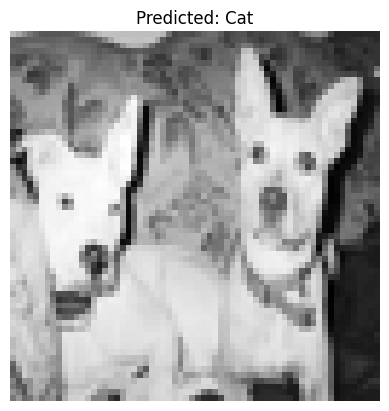

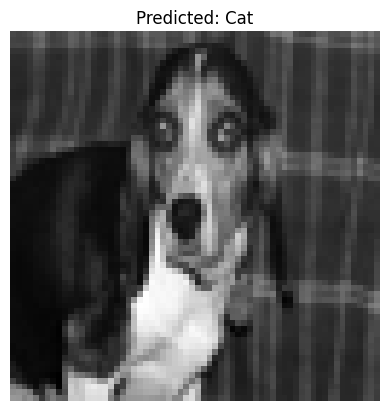

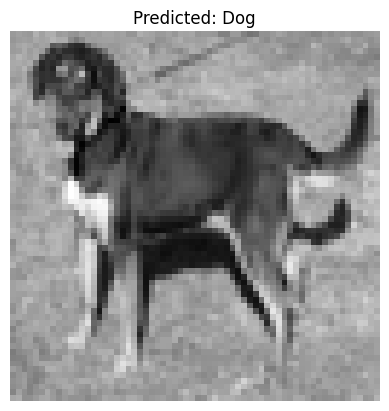

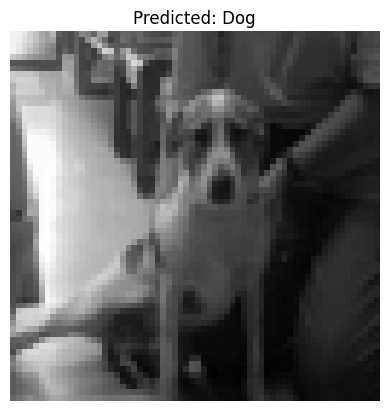

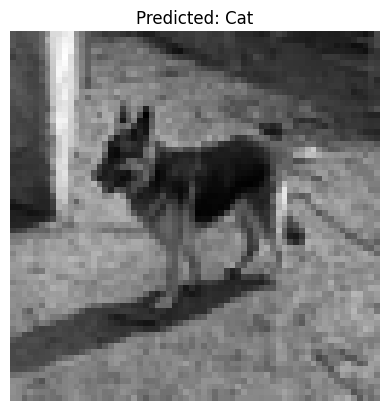

In [19]:
import os
import numpy as np
from PIL import Image
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import zipfile

# Unzip the train.zip file (only once)
with zipfile.ZipFile('/content/dogs-vs-cats/train.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dogs-vs-cats/train')

# ✅ Fixed: Correct path to where images were extracted
train_dir = '/content/dogs-vs-cats/train/train'

# Preprocess
img_size = 64
X, y = [], []
max_images = 2000

for i, img_name in enumerate(tqdm(os.listdir(train_dir))):
    if img_name.endswith('.jpg'):
        label = 0 if 'cat' in img_name else 1
        img_path = os.path.join(train_dir, img_name)
        try:
            img = Image.open(img_path).convert('L').resize((img_size, img_size))
            img_array = np.array(img).flatten()
            X.append(img_array)
            y.append(label)
        except:
            continue
    if i >= max_images:
        break

X = np.array(X)
y = np.array(y)

# Validate that images were loaded
print(f"Loaded {len(X)} images.")

# Normalize & split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Evaluate
y_pred = svm.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

# Show predictions
for i in range(5):
    img = X_val[i].reshape(img_size, img_size)
    plt.imshow(img, cmap='gray')
    plt.title("Predicted: " + ("Dog" if y_pred[i] else "Cat"))
    plt.axis('off')
    plt.show()
